In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import text
from sqlalchemy import create_engine
import pandas as pd

In [2]:
#!/usr/bin/python
import psycopg2
from config import config
 
# read connection parameters
params = config()
# connect to the PostgreSQL server
print('Connecting to the PostgreSQL database...')
conn = psycopg2.connect(**params)

Connecting to the PostgreSQL database...


In [3]:
#1 List the following details of each employee: employee number, last name, first name, gender, and salary.
employees = pd.read_sql('select employees.emp_no, last_name, first_name, gender, salary from employees inner join salaries on employees.emp_no=salaries.emp_no', conn, parse_dates=['birth_date', 'hire_date'])
employees.head(10)

,emp_no,last_name,first_name,gender,salary
0,10001,Facello,Georgi,M,60117
1,10005,Maliniak,Kyoichi,M,78228
2,10010,Piveteau,Duangkaew,F,72488
3,10011,Sluis,Mary,F,42365
4,10013,Terkki,Eberhardt,M,40000
5,10017,Bouloucos,Cristinel,F,71380
6,10018,Peha,Kazuhide,F,55881
7,10019,Haddadi,Lillian,M,44276
8,10026,Berztiss,Yongqiao,M,47585
9,10035,Chappelet,Alain,M,41538


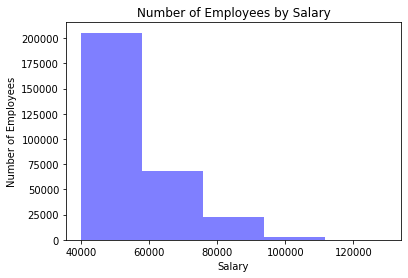

In [4]:
#Create a histogram to visualize the most common salary ranges for employees
x = employees['salary']
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Number of Employees by Salary")
plt.show()

In [5]:
#Create a bar chart of average salary by title

salarybytitle = pd.read_sql('select title, avg(salary ) as avg_salary from salaries inner join titles on salaries.emp_no=titles.emp_no group by title', conn)
salarybytitle.head(10)

,title,avg_salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


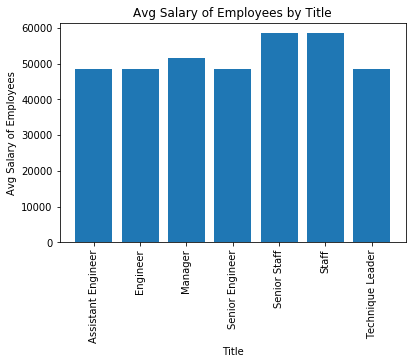

In [22]:
plt.bar(salarybytitle['title'],salarybytitle['avg_salary'])
plt.xlabel("Title")
plt.ylabel("Avg Salary of Employees")
plt.title("Avg Salary of Employees by Title")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [23]:
conn.close()
print('Database connection closed.')

Database connection closed.
